# Tutorial

This is an introduction to LArray. It is not intended to be a fully comprehensive manual. 
It is mainly dedicated to help new users to familiarize with it and others to remind essentials.

The first step to use the LArray library is to import it:

In [2]:
import larray as la

In [3]:
%matplotlib inline
import numpy as np

In [4]:
# To simplify what is printed when an exception is raised
class ExCtx(object):
    def __enter__(self):
        pass
    def __exit__(self, e_type, e_value, traceback):
        print(e_type, e_value)
        return True

## Axis creation

An axis represents a dimension of an LArray object. It consists of a name and a list of labels.
They are several ways to create an axis:

In [5]:
# create a wildcard axis 
age = la.Axis('age', 3)
# labels given as a string (labels are separated with commas)
sex = la.Axis('sex', 'M,F')
# labels given as a list 
time = la.Axis('time', [2007, 2008, 2009])
# labels generated using a special syntax  
other = la.Axis('other', 'A01..C03')

age, sex, time, other

(Axis('age', 3),
 Axis('sex', ['M', 'F']),
 Axis('time', [2007, 2008, 2009]),
 Axis('other', ['A01', 'A02', 'A03', 'B01', 'B02', 'B03', 'C01', 'C02', 'C03']))

## Array creation

A LArray object represents a multidimensional array with labeled axes. 

### From scratch

To create an array from scratch, you need to provide the data and a list of axes. 
Optionally, a title can be defined.

In [6]:
# list of the axes
axes = [age, sex, time, other]
# data (the shape of data array must match axes lengths)
data = np.random.randint(100, size=[len(axis) for axis in axes])
# title (optional)
title = 'random data'

arr = la.LArray(data, axes, title)
arr

age* | sex | time\other | A01 | A02 | A03 | B01 | B02 | B03 | C01 | C02 | C03
   0 |   M |       2007 |  61 |  25 |  27 |  83 |  35 |  50 |  26 |  84 |  35
   0 |   M |       2008 |  37 |  69 |  87 |  57 |  90 |  90 |  89 |  45 |  80
   0 |   M |       2009 |  11 |  18 |  18 |  36 |  82 |  36 |  94 |  68 |  95
   0 |   F |       2007 |  67 |  22 |  50 |  19 |  46 |  62 |  22 |  65 |  63
   0 |   F |       2008 |  99 |  35 |   3 |  76 |  42 |  48 |  58 |  69 |  32
   0 |   F |       2009 |  88 |  11 |   5 |  83 |   8 |  69 |  58 |  94 |  93
   1 |   M |       2007 |  14 |  62 |  48 |  20 |  23 |   9 |  12 |  83 |  93
   1 |   M |       2008 |  61 |  79 |  42 |  55 |  23 |  41 |  48 |  77 |  48
   1 |   M |       2009 |  12 |  62 |  44 |  42 |  72 |  85 |  86 |   2 |  79
   1 |   F |       2007 |  24 |  91 |  89 |  93 |  51 |  98 |  98 |  69 |  66
   1 |   F |       2008 |  36 |  28 |  39 |  82 |   5 |  49 |  97 |  27 |   1
   1 |   F |       2009 |  33 |  67 |  31 |  69 |  96 |  99 |  7

### Array creation functions

Arrays can also be generated in an easier way through creation functions:

- **ndrange** : fills an array with increasing numbers
- **ndtest**  : same as ndrange but with axes generated automatically (for testing)
- **empty**   : creates an array but leaves its allocated memory unchanged (i.e., it contains "garbage". Be careful !)
- **zeros**   : fills an array with 0 
- **ones**    : fills an array with 1
- **full**    : fills an array with a given value

Except for ndtest, a list of axes must be provided. Axes can be passed in different ways:

- as Axis objects 
- as integers defining the lengths of auto-generated wildcard axes
- as a string : 'sex=M,F;time=2007,2008,2009' (name is optional)
- as pairs (name, labels)

Optionally, the type of data stored by the array can be specified using argument dtype.

In [7]:
# start defines the starting value of data
la.ndrange([age, 'sex=M,F', ('time', '2007,2008,2009')], start=-1, title='ndrange example')

age* | sex\time | 2007 | 2008 | 2009
   0 |        M |   -1 |    0 |    1
   0 |        F |    2 |    3 |    4
   1 |        M |    5 |    6 |    7
   1 |        F |    8 |    9 |   10
   2 |        M |   11 |   12 |   13
   2 |        F |   14 |   15 |   16

In [8]:
# start defines the starting value of data
# label_start defines the starting index of labels
la.ndtest((3, 3), start=-1, label_start=2, , title='ndtest example')

a\b | b2 | b3 | b4
 a2 | -1 |  0 |  1
 a3 |  2 |  3 |  4
 a4 |  5 |  6 |  7

In [9]:
# empty generates uninitialised array with correct axes (much faster but use with care!).
# This not really random either, it just reuses a portion of memory that is available, with whatever content is there. 
# Use it only if performance matters and make sure all data will be overridden. 
la.empty([age, 'sex=M,F', ('time', '2007,2008,2009')], title='empty example')

age* | sex\time |                 2007 |                 2008 |                 2009
   0 |        M | 1.2009094192155e-311 | 1.2008848008177e-311 | 1.2008846373333e-311
   0 |        F | 1.2008830638805e-311 |  1.200884244215e-311 |  1.200874353187e-311
   1 |        M | 1.2008421777547e-311 |  1.200842177798e-311 | 1.2008421778416e-311
   1 |        F |  1.200842177885e-311 | 1.2008421779286e-311 | 1.2008650739464e-311
   2 |        M |                  0.0 |                  0.0 |                  0.0
   2 |        F |                  0.0 |                  0.0 |                  0.0

In [10]:
# example with anonymous axes
la.zeros([3, 'M,F', (None, '2007,2008,2009')], , title='zeros example')

{0}* | {1}\{2} | 2007 | 2008 | 2009
   0 |       M |  0.0 |  0.0 |  0.0
   0 |       F |  0.0 |  0.0 |  0.0
   1 |       M |  0.0 |  0.0 |  0.0
   1 |       F |  0.0 |  0.0 |  0.0
   2 |       M |  0.0 |  0.0 |  0.0
   2 |       F |  0.0 |  0.0 |  0.0

In [11]:
# dtype=int forces to store int data instead of default float
la.ones([age, 'sex=M,F', ('time', '2007,2008,2009')], title='ones example', dtype=int)

age* | sex\time | 2007 | 2008 | 2009
   0 |        M |    1 |    1 |    1
   0 |        F |    1 |    1 |    1
   1 |        M |    1 |    1 |    1
   1 |        F |    1 |    1 |    1
   2 |        M |    1 |    1 |    1
   2 |        F |    1 |    1 |    1

In [12]:
la.full([age, 'sex=M,F', ('time', '2007,2008,2009')], 1.23, title='full example')

age* | sex\time | 2007 | 2008 | 2009
   0 |        M | 1.23 | 1.23 | 1.23
   0 |        F | 1.23 | 1.23 | 1.23
   1 |        M | 1.23 | 1.23 | 1.23
   1 |        F | 1.23 | 1.23 | 1.23
   2 |        M | 1.23 | 1.23 | 1.23
   2 |        F | 1.23 | 1.23 | 1.23

All the above function exist in *{func}_like* variants which takes axes from another array

In [13]:
la.ones_like(arr, title='ones_like example')

age* | sex | time\other | A01 | A02 | A03 | B01 | B02 | B03 | C01 | C02 | C03
   0 |   M |       2007 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   0 |   M |       2008 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   0 |   M |       2009 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   0 |   F |       2007 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   0 |   F |       2008 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   0 |   F |       2009 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   M |       2007 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   M |       2008 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   M |       2009 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   F |       2007 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   F |       2008 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1
   1 |   F |       2009 |   1 |   1 |   1 |   1 |   1 |   1 |   

### Create Sequential

The special **create_sequencial** function allows you to create an array from an axis by iteratively applying a function to a given initial value. 
You can choose between **inc** and **mult** functions or define your own.

In [14]:
# With initial=1.0 and inc=0.5, we generate the sequence 1.0, 1.5, 2.0, 2.5, 3.0, ... 
la.create_sequential(sex, initial=1.0, inc=0.5)

sex |   M |   F
    | 1.0 | 1.5

In [15]:
# With initial=1.0 and mult=2.0, we generate the sequence 1.0, 2.0, 4.0, 8.0, ... 
la.create_sequential(age, initial=1.0, mult=2.0)

age* |   0 |   1 |   2
     | 1.0 | 2.0 | 4.0

In [16]:
# Using your own function
la.create_sequential(time, initial=2.0, func=lambda value: value**2)

time | 2007 | 2008 | 2009
     |  2.0 |  4.0 | 16.0

You can also create N-dimensional array by passing (N-1)-dimensional array to initial, inc or mult argument

In [17]:
birth = la.LArray([1.05, 1.15], sex)
cumulate_newborns = la.create_sequential(time, initial=0.0, inc=birth)
cumulate_newborns

sex\time | 2007 | 2008 | 2009
       M |  0.0 | 1.05 |  2.1
       F |  0.0 | 1.15 |  2.3

In [18]:
pop_age = la.Axis('age', '80..83')
start_pop = la.LArray([90, 100], sex) 
survival = la.LArray([0.96, 0.98], sex)
pop = la.create_sequential(pop_age, initial=start_pop, mult=survival)
pop

sex\age |    80 |                81 |                82 |                83
      M |  90.0 | 86.39999999999999 | 82.94399999999999 | 79.62623999999998
      F | 100.0 |              98.0 | 96.03999999999999 | 94.11919999999999

## Load/Dump from files

### Load from files

Arrays can be loaded from CSV files (see documentation of *read_csv* for more details)

In [30]:
# read_tsv is a shortcut when data are separated by tabs instead of commas (default separator of read_csv)
# read_eurostat is a shortcut to read EUROSTAT TSV files  
household = la.read_csv('hh.csv')
household.info

26 x 3 x 7
 time [26]: 1991 1992 1993 ... 2014 2015 2016
 geo [3]: 'BruCap' 'Fla' 'Wal'
 hh_type [7]: 'SING' "'MAR0" 'MAR+' ... 'UNM+' 'H1P' 'OTHR'

or Excel sheets (see documentation of *read_excel* for more details)

In [31]:
# loads array from the first sheet if no sheetname is given 
pop = la.read_excel('data.xlsx', 'pop')
pop.info

26 x 3 x 121 x 2 x 2
 time [26]: 1991 1992 1993 ... 2014 2015 2016
 geo [3]: 'BruCap' 'Fla' 'Wal'
 age [121]: 0 1 2 ... 118 119 120
 sex [2]: 'M' 'F'
 nat [2]: 'BE' 'FO'

or HDF5 files (HDF5 is file format designed to store and organize large amounts of data. An HDF5 file can contain multiple arrays. See documentation of *read_hdf* for more details)

In [32]:
mortality = la.read_hdf('data.h5','qx')
mortality.info

26 x 3 x 121 x 2 x 2
 time [26]: 1991 1992 1993 ... 2014 2015 2016
 geo [3]: 'BruCap' 'Fla' 'Wal'
 age [121]: 0 1 2 ... 118 119 120
 sex [2]: 'M' 'F'
 nat [2]: 'BE' 'FO'

or SAS files (see documentation of *read_sas* for more details)

In [33]:
la.read_sas('qx.xpt')

### Dump in files

Arrays can be dumped in CSV files (see documentation of *to_csv* for more details) 

In [34]:
household.to_csv('hh2.csv')

or in Excel files (see documentation of *to_excel* for more details)

In [35]:
# if the file does not already exist, it is created with a single sheet, 
# otherwise a new sheet is added to it
household.to_excel('data2.xlsx')
# it is usually better to specify the sheet explicitly (by name or position) though
household.to_excel('data2.xlsx', 'hh')

or in HDF5 files (see documentation of *to_hdf* for more details)

In [36]:
household.to_hdf('data2.h5', 'hh')


### more Excel IO

In [37]:
# create a 3 x 2 x 3 array 
age = la.Axis('age', 3)
sex = la.Axis('sex', 'M,F')
time = la.Axis('time', [2007, 2008, 2009])
arr = la.ndrange([age, sex, time])
arr

age* | sex\time | 2007 | 2008 | 2009
   0 |        M |    0 |    1 |    2
   0 |        F |    3 |    4 |    5
   1 |        M |    6 |    7 |    8
   1 |        F |    9 |   10 |   11
   2 |        M |   12 |   13 |   14
   2 |        F |   15 |   16 |   17

#### Write Arrays

Open an Excel file

In [38]:
wb = la.open_excel('test.xlsx')

Put an array in an Excel Sheet, **excluding** headers (labels)

In [39]:
# put arr at A1 in Sheet1, excluding headers (labels)
wb['Sheet1'] = arr
# same but starting at A9
# note that Sheet1 must exist
wb['Sheet1']['A9'] = arr

Put an array in an Excel Sheet, **including** headers (labels)

In [40]:
# dump arr at A1 in Sheet2, including headers (labels)
wb['Sheet2'] = arr.dump()
# same but starting at A10
wb['Sheet2']['A10'] = arr.dump()

Save file to disk

In [41]:
wb.save()

Close file

In [42]:
wb.close()

#### Read Arrays

Open an Excel file

In [43]:
wb = la.open_excel('test.xlsx')

Load an array from a sheet (assuming the presence of (correctly formatted) headers and only one array in sheet)

In [44]:
# save one array in Sheet3 (including headers)
wb['Sheet3'] = arr.dump()

# load array from the data starting at A1 in Sheet3
arr = wb['Sheet3'].load()
arr

age* | sex\time | 2007 | 2008 | 2009
   0 |        M |    0 |    1 |    2
   0 |        F |    3 |    4 |    5
   1 |        M |    6 |    7 |    8
   1 |        F |    9 |   10 |   11
   2 |        M |   12 |   13 |   14
   2 |        F |   15 |   16 |   17

Load an array with its axes information from a range

In [45]:
# if you need to use the same sheet several times,
# you can create a sheet variable 
sheet2 = wb['Sheet2']

# load array contained in the 4 x 4 table defined by cells A10 and D14
arr2 = sheet2['A10:D14'].load()
arr2

age* | sex\time | 2007 | 2008
   0 |        M |    0 |    1
   0 |        F |    3 |    4
   1 |        M |    6 |    7
   1 |        F |    9 |   10

#### Read Ranges (experimental)

Load an array (raw data) with no axis information from a range

In [46]:
arr3 = wb['Sheet1']['A1:B4']
arr3

{0}*\{1}* |   0 |    1
        0 | 0.0 |  1.0
        1 | 3.0 |  4.0
        2 | 6.0 |  7.0
        3 | 9.0 | 10.0

in fact, this is not really an LArray ...

In [47]:
type(arr3)

larray.excel.Range

... but it can be used as such

In [48]:
arr3.sum(axis=0)

{0}* |    0 |    1
     | 18.0 | 22.0

... and it can be used for other stuff, like setting the formula instead of the value:

In [49]:
arr3.formula = '=D10+1'

In the future, we should also be able to set font name, size, style, etc.

In [50]:
wb.close()

## Inspecting

In [51]:
# load population array
pop = la.read_csv('pop.csv')

Get array summary : dimensions + description of axes 

In [52]:
pop.info

26 x 3 x 121 x 2 x 2
 time [26]: 1991 1992 1993 ... 2014 2015 2016
 geo [3]: 'BruCap' 'Fla' 'Wal'
 age [121]: 0 1 2 ... 118 119 120
 sex [2]: 'M' 'F'
 nat [2]: 'BE' 'FO'

Get axes

In [53]:
time, geo, age, sex, nat = pop.axes

Get array dimensions

In [54]:
pop.shape

(26, 3, 121, 2, 2)

Get number of elements

In [55]:
pop.size

37752

Get size in memory

In [56]:
pop.nbytes

302016

Start viewer (graphical user interface) in read-only mode. 
This will open a new window and block execution of the rest of code until the windows is closed!
Required PyQt installed.

In [57]:
la.view(pop)

Load array in an Excel sheet

In [58]:
pop.to_excel()

## Selection (Subsets)

LArray allows to select a subset of an array either by labels or positions

### Selection by Labels

To take a subset of an array using labels, use brackets [ ]. Let's start by selecting a single element: 

In [60]:
# here we select the value associated with Belgian women of age 50 from Brussels region for the year 2015
pop[2015, 'BruCap', 50, 'F', 'BE']

4813

Continue with selecting a subset using slices and lists of labels

In [61]:
# here we select the subset associated with Belgian women of age 50, 51 and 52 
# from Brussels region for the years 2010 to 2016
pop[2010:2016, 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2010 | 4869 | 4811 | 4699
    2011 | 5015 | 4860 | 4792
    2012 | 4722 | 5014 | 4818
    2013 | 4711 | 4727 | 5007
    2014 | 4788 | 4702 | 4730
    2015 | 4813 | 4767 | 4676
    2016 | 4814 | 4792 | 4740

In [62]:
# slices bounds are optional: 
# if not given start is assumed to be the first label and stop is the last one.
# Here we select all years starting from 2010
pop[2010:, 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2010 | 4869 | 4811 | 4699
    2011 | 5015 | 4860 | 4792
    2012 | 4722 | 5014 | 4818
    2013 | 4711 | 4727 | 5007
    2014 | 4788 | 4702 | 4730
    2015 | 4813 | 4767 | 4676
    2016 | 4814 | 4792 | 4740

In [63]:
# Slices can also have a step (defaults to 1), to take every Nth labels
# Here we select all even years starting from 2010
pop[2010::2, 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2010 | 4869 | 4811 | 4699
    2012 | 4722 | 5014 | 4818
    2014 | 4788 | 4702 | 4730
    2016 | 4814 | 4792 | 4740

In [64]:
# one can also use list of labels to take non-contiguous labels.
# Here we select years 2008, 2010, 2013 and 2015
pop[[2008, 2010, 2013, 2015], 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2008 | 4731 | 4735 | 4724
    2010 | 4869 | 4811 | 4699
    2013 | 4711 | 4727 | 5007
    2015 | 4813 | 4767 | 4676

The order of indexing does not matter either, so you usually do not care/have to remember about axes positions during computation. 
It only matters for output.

In [65]:
# order of index doesn't matter
pop['F', 'BE', 'BruCap', [2008, 2010, 2013, 2015], 50:52]

time\age |   50 |   51 |   52
    2008 | 4731 | 4735 | 4724
    2010 | 4869 | 4811 | 4699
    2013 | 4711 | 4727 | 5007
    2015 | 4813 | 4767 | 4676

<div class="alert alert-warning">

**Warning:** Selecting by labels as above works well as long as there is no ambiguity. 
When two or more axes have common labels, it may lead to a crash. 
Don't panic! The solution is then to precise to which axis belong the labels.  

</div>

In [66]:
# let us now create an array with the same labels on several axes
age = la.Axis('age', range(80))
weight = la.Axis('weight', range(120))
size = la.Axis('size', range(200))
arr_ws = la.ndrange([age, weight, size])

# let's try to select teenagers with size between 1 m 60 and 1 m 65 and weight > 80 kg.
# In this case the subset is ambiguous and this results in an error:
with ExCtx():
    arr_ws[10:18, :80, 160:165]

<class 'ValueError'> slice(10, 18, None) is ambiguous (valid in age, weight, size)


In [67]:
# the solution is simple. You need to precise the axes on which you make a selection
arr_ws[age[10:18], weight[:80], size[160:165]]

age | weight\size |    160 |    161 |    162 |    163 |    164 |    165
 10 |           0 | 240160 | 240161 | 240162 | 240163 | 240164 | 240165
 10 |           1 | 240360 | 240361 | 240362 | 240363 | 240364 | 240365
 10 |           2 | 240560 | 240561 | 240562 | 240563 | 240564 | 240565
 10 |           3 | 240760 | 240761 | 240762 | 240763 | 240764 | 240765
 10 |           4 | 240960 | 240961 | 240962 | 240963 | 240964 | 240965
... |         ... |    ... |    ... |    ... |    ... |    ... |    ...
 18 |          76 | 447360 | 447361 | 447362 | 447363 | 447364 | 447365
 18 |          77 | 447560 | 447561 | 447562 | 447563 | 447564 | 447565
 18 |          78 | 447760 | 447761 | 447762 | 447763 | 447764 | 447765
 18 |          79 | 447960 | 447961 | 447962 | 447963 | 447964 | 447965
 18 |          80 | 448160 | 448161 | 448162 | 448163 | 448164 | 448165

### Speciale variable x

When selecting, assiging or using aggregate functions, an axis can be refered via the special variable **x**: 

- pop[x.age[:20]] 
- pop.sum(x.age)

This gives you acces to axes of the array you are manipulating. The main drawback of using *x* is that you lose the autocompletion available from many editors. It only works with non-wildcard axes. 

In [68]:
from larray import x

# the previous example could have been also written as  
arr_ws[x.age[10:18], x.weight[:80], x.size[160:165]]

age | weight\size |    160 |    161 |    162 |    163 |    164 |    165
 10 |           0 | 240160 | 240161 | 240162 | 240163 | 240164 | 240165
 10 |           1 | 240360 | 240361 | 240362 | 240363 | 240364 | 240365
 10 |           2 | 240560 | 240561 | 240562 | 240563 | 240564 | 240565
 10 |           3 | 240760 | 240761 | 240762 | 240763 | 240764 | 240765
 10 |           4 | 240960 | 240961 | 240962 | 240963 | 240964 | 240965
... |         ... |    ... |    ... |    ... |    ... |    ... |    ...
 18 |          76 | 447360 | 447361 | 447362 | 447363 | 447364 | 447365
 18 |          77 | 447560 | 447561 | 447562 | 447563 | 447564 | 447565
 18 |          78 | 447760 | 447761 | 447762 | 447763 | 447764 | 447765
 18 |          79 | 447960 | 447961 | 447962 | 447963 | 447964 | 447965
 18 |          80 | 448160 | 448161 | 448162 | 448163 | 448164 | 448165

### Selection by Positions

Sometimes it is more practical to use positions along the axis, instead of labels. You need to add the character **i** before the brackets: *.i[positions]*. As for selection with labels, you can use single position or slice or list of positions. Positions can be also negative (-1 represent the last element of an axis).

<div class="alert alert-info">

**Note**: Remember that positions (indices) are always **0-based** in Python. So the first element is at position 0, the second is at position 1, etc.

</div>

In [69]:
# here we select the subset associated with Belgian women of age 50, 51 and 52 
# from Brussels region for the first 3 years
pop[x.time.i[:3], 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    1991 | 3739 | 4138 | 4101
    1992 | 3373 | 3665 | 4088
    1993 | 3648 | 3335 | 3615

In [70]:
# same but for the last 3 years
pop[x.time.i[-3:], 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2014 | 4788 | 4702 | 4730
    2015 | 4813 | 4767 | 4676
    2016 | 4814 | 4792 | 4740

In [71]:
# using list of positions
pop[x.time.i[-9,-7,-4,-2], 'BruCap', 50:52, 'F', 'BE']

time\age |   50 |   51 |   52
    2008 | 4731 | 4735 | 4724
    2010 | 4869 | 4811 | 4699
    2013 | 4711 | 4727 | 5007
    2015 | 4813 | 4767 | 4676

<div class="alert alert-warning">

**Warning**: The end *indice* (position) is EXCLUSIVE while the end label is INCLUSIVE.

</div>

In [72]:
# with labels (3 is included)
pop[2015, 'BruCap', x.age[:3], 'F', 'BE']

age |    0 |    1 |    2 |    3
    | 6020 | 5882 | 6023 | 5861

In [73]:
# with position (3 is out)
pop[2015, 'BruCap', x.age.i[:3], 'F', 'BE']

age |    0 |    1 |    2
    | 6020 | 5882 | 6023

You can use *.i[]* selection directly on array instead of axes. In this context, if you want to select a subset of the first and third axes for example, you must use a full slice **:** for the second one. 

In [74]:
# here we select the last year and first 3 ages
pop.i[-1, :, :3]

# which is equivalent to 
pop.i[-1, :, :3, :, :]

   geo | age | sex\nat |    BE |   FO
BruCap |   0 |       M |  6155 | 3104
BruCap |   0 |       F |  5900 | 2817
BruCap |   1 |       M |  6165 | 3068
BruCap |   1 |       F |  5916 | 2946
BruCap |   2 |       M |  6053 | 2918
BruCap |   2 |       F |  5736 | 2776
   Fla |   0 |       M | 29993 | 3717
   Fla |   0 |       F | 28483 | 3587
   Fla |   1 |       M | 31292 | 3716
   Fla |   1 |       F | 29721 | 3575
   Fla |   2 |       M | 31718 | 3597
   Fla |   2 |       F | 30353 | 3387
   Wal |   0 |       M | 17869 | 1472
   Wal |   0 |       F | 17242 | 1454
   Wal |   1 |       M | 18820 | 1432
   Wal |   1 |       F | 17604 | 1443
   Wal |   2 |       M | 19076 | 1444
   Wal |   2 |       F | 18189 | 1358

### Assigning subsets

#### Assigning value

Assign a value to a subset

In [75]:
# let's take a smaller array
pop = la.read_csv('pop.csv')[2016, 'BruCap', 100:105]
pop2 = pop
pop2

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  8 |  0
102 |       F | 26 |  1
103 |       M |  2 |  1
103 |       F | 17 |  2
104 |       M |  2 |  1
104 |       F | 14 |  0
105 |       M |  0 |  0
105 |       F |  2 |  2

In [76]:
# set all data corresponding to age >= 102 to 0
pop2[102:] = 0
pop2

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  0 |  0
102 |       F |  0 |  0
103 |       M |  0 |  0
103 |       F |  0 |  0
104 |       M |  0 |  0
104 |       F |  0 |  0
105 |       M |  0 |  0
105 |       F |  0 |  0

One very important gotcha though...

<div class="alert alert-warning">

**WARNING**: Modifying a slice of an array in-place like we did above should be done with care otherwise you could have **unexpected effects**. The reason is that taking a **slice** subset of an array does not return a copy of that array, but rather a view on that array. To avoid such behavior, use **.copy()** method.

</div>

Remember: 

- taking a slice subset of an array is extremely fast (no data is copied)
- if one modifies that subset in-place, one also **modifies the original array**
- **.copy()** returns a copy of the subset (takes speed and memory) but allows you to change the subset without modifying the original array in the same time

In [77]:
# indeed, data from the original array have also changed
pop

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  0 |  0
102 |       F |  0 |  0
103 |       M |  0 |  0
103 |       F |  0 |  0
104 |       M |  0 |  0
104 |       F |  0 |  0
105 |       M |  0 |  0
105 |       F |  0 |  0

In [78]:
# the right way
pop = la.read_csv('pop.csv')[2016, 'BruCap', 100:105]

pop2 = pop.copy()
pop2[102:] = 0
pop2

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  0 |  0
102 |       F |  0 |  0
103 |       M |  0 |  0
103 |       F |  0 |  0
104 |       M |  0 |  0
104 |       F |  0 |  0
105 |       M |  0 |  0
105 |       F |  0 |  0

In [79]:
# now, data from the original array have not changed this time
pop

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  8 |  0
102 |       F | 26 |  1
103 |       M |  2 |  1
103 |       F | 17 |  2
104 |       M |  2 |  1
104 |       F | 14 |  0
105 |       M |  0 |  0
105 |       F |  2 |  2

#### Assigning Arrays & Broadcasting

Instead of a value, we can also assign an array to a subset. In that case, that array can have less axes than the target but those which are present must be compatible with the subset being targetted.

In [80]:
new_value = la.LArray([[1, -1], [2, -2]],[sex, nat])
new_value

sex\nat | BE | FO
      M |  1 | -1
      F |  2 | -2

In [81]:
# this assigns 1, -1 to Belgian, Foreigner men 
# and 2, -2 to Belgian, Foreigner women for all 
# people older than 100
pop[102:] = new_value
pop

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  1 | -1
102 |       F |  2 | -2
103 |       M |  1 | -1
103 |       F |  2 | -2
104 |       M |  1 | -1
104 |       F |  2 | -2
105 |       M |  1 | -1
105 |       F |  2 | -2

<div class="alert alert-warning">

**Warning**: The array being assigned must have compatible axes with the target subset

</div>

In [82]:
# assume we define the following array with shape 3 x 2 x 2
new_value = la.zeros([la.Axis('age', 3), sex, nat]) 
new_value

age* | sex\nat |  BE |  FO
   0 |       M | 0.0 | 0.0
   0 |       F | 0.0 | 0.0
   1 |       M | 0.0 | 0.0
   1 |       F | 0.0 | 0.0
   2 |       M | 0.0 | 0.0
   2 |       F | 0.0 | 0.0

In [83]:
# now let's try to assign the previous array in a subset with shape 7 x 2 x 2
with ExCtx():
    pop[102:] = new_value

<class 'ValueError'> could not broadcast input array from shape (3,2,2) into shape (4,2,2)


In [84]:
# but this works
pop[102:104] = new_value
pop

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  0 |  0
102 |       F |  0 |  0
103 |       M |  0 |  0
103 |       F |  0 |  0
104 |       M |  0 |  0
104 |       F |  0 |  0
105 |       M |  1 | -1
105 |       F |  2 | -2

### Boolean filtering

Boolean filtering can be use to extract subsets.

In [85]:
#Let's focus on population living in Brussels during the year 2016
pop = la.read_csv('pop.csv')[2016, 'BruCap']

# here we select all males and females with age less than 5 and 10 respectively
subset = pop[((x.sex == 'H') & (x.age <= 5)) | ((x.sex == 'F') & (x.age <= 10))]
subset

age,sex\nat |   BE |   FO
        0,F | 5900 | 2817
        1,F | 5916 | 2946
        2,F | 5736 | 2776
        3,F | 5883 | 2734
        4,F | 5784 | 2523
        5,F | 5780 | 2521
        6,F | 5759 | 2290
        7,F | 5518 | 2234
        8,F | 5474 | 2066
        9,F | 5354 | 1896
       10,F | 5200 | 1785

<div class="alert alert-info">

**Note**: Be aware that after boolean filtering, several axes may have merged. 

</div>

In [86]:
# 'age' and 'sex' axes have been merged together
subset.info

11 x 2
 age,sex [11]: '0,F' '1,F' '2,F' ... '8,F' '9,F' '10,F'
 nat [2]: 'BE' 'FO'

This may be not what you because previous selections on merged axes are no longer valid 

In [87]:
# now let's try to calculate the proportion of females with age less than 10
with ExCtx():
    subset['F'].sum() / pop['F'].sum()

<class 'ValueError'> F is not a valid label for any axis


Therefore, it is sometimes more useful to not select, but rather set to 0 (or another value) non matching elements

In [88]:
subset = pop.copy()
subset[((x.sex == 'F') & (x.age > 10))] = 0
subset['F', :20]

age\nat |   BE |   FO
      0 | 5900 | 2817
      1 | 5916 | 2946
      2 | 5736 | 2776
      3 | 5883 | 2734
      4 | 5784 | 2523
      5 | 5780 | 2521
      6 | 5759 | 2290
      7 | 5518 | 2234
      8 | 5474 | 2066
      9 | 5354 | 1896
     10 | 5200 | 1785
     11 |    0 |    0
     12 |    0 |    0
     13 |    0 |    0
     14 |    0 |    0
     15 |    0 |    0
     16 |    0 |    0
     17 |    0 |    0
     18 |    0 |    0
     19 |    0 |    0
     20 |    0 |    0

In [89]:
# now we can calculate the proportion of females with age less than 10
subset['F'].sum() / pop['F'].sum()

0.14618110657051941

Boolean filtering can also mix axes and arrays. Example above could also have been written as

In [90]:
age_limit = la.create_sequential(sex, initial=5, inc=5)
age_limit

sex | M |  F
    | 5 | 10

In [91]:
age = pop.axes['age']
(age <= age_limit)[:20]

age\sex |     M |     F
      0 |  True |  True
      1 |  True |  True
      2 |  True |  True
      3 |  True |  True
      4 |  True |  True
      5 |  True |  True
      6 | False |  True
      7 | False |  True
      8 | False |  True
      9 | False |  True
     10 | False |  True
     11 | False | False
     12 | False | False
     13 | False | False
     14 | False | False
     15 | False | False
     16 | False | False
     17 | False | False
     18 | False | False
     19 | False | False
     20 | False | False

In [92]:
subset = pop.copy()
subset[x.age > age_limit] = 0
subset['F'].sum() / pop['F'].sum()

0.14618110657051941

Finally, you can choose to filter on data instead of axes

In [93]:
# let's focus on females older than 90
subset = pop['F', 90:110].copy()
subset

age\nat |   BE |  FO
     90 | 1477 | 136
     91 | 1298 | 105
     92 | 1141 |  78
     93 |  906 |  74
     94 |  739 |  65
     95 |  566 |  53
     96 |  327 |  25
     97 |  171 |  21
     98 |  135 |   9
     99 |   92 |   8
    100 |   60 |   3
    101 |   66 |   5
    102 |   26 |   1
    103 |   17 |   2
    104 |   14 |   0
    105 |    2 |   2
    106 |    3 |   3
    107 |    1 |   2
    108 |    1 |   0
    109 |    0 |   0
    110 |    0 |   0

In [94]:
# here we set to 0 all data < 10
subset[subset < 10] = 0
subset

age\nat |   BE |  FO
     90 | 1477 | 136
     91 | 1298 | 105
     92 | 1141 |  78
     93 |  906 |  74
     94 |  739 |  65
     95 |  566 |  53
     96 |  327 |  25
     97 |  171 |  21
     98 |  135 |   0
     99 |   92 |   0
    100 |   60 |   0
    101 |   66 |   0
    102 |   26 |   0
    103 |   17 |   0
    104 |   14 |   0
    105 |    0 |   0
    106 |    0 |   0
    107 |    0 |   0
    108 |    0 |   0
    109 |    0 |   0
    110 |    0 |   0

## Manipulates axes from arrays

In [95]:
# let's start with
pop = la.read_csv('pop.csv')[2016, 'BruCap', 90:95]
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

### Relabeling

Replace all labels of one axis

In [96]:
# returns a copy by default
pop_new_labels = pop.set_labels(x.sex, ['Men', 'Women'])
pop_new_labels

age | sex\nat |   BE |  FO
 90 |     Men |  539 |  74
 90 |   Women | 1477 | 136
 91 |     Men |  499 |  49
 91 |   Women | 1298 | 105
 92 |     Men |  332 |  35
 92 |   Women | 1141 |  78
 93 |     Men |  287 |  27
 93 |   Women |  906 |  74
 94 |     Men |  237 |  23
 94 |   Women |  739 |  65
 95 |     Men |  154 |  19
 95 |   Women |  566 |  53

In [98]:
# inplace flag avoids to create a copy
pop.set_labels(x.sex, ['M', 'F'], inplace=True)
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

### Renaming axes

Rename one axis

In [99]:
# 'rename' returns a copy of the array
pop2 = pop.rename(x.sex, 'gender')
pop2

age | gender\nat |   BE |  FO
 90 |          M |  539 |  74
 90 |          F | 1477 | 136
 91 |          M |  499 |  49
 91 |          F | 1298 | 105
 92 |          M |  332 |  35
 92 |          F | 1141 |  78
 93 |          M |  287 |  27
 93 |          F |  906 |  74
 94 |          M |  237 |  23
 94 |          F |  739 |  65
 95 |          M |  154 |  19
 95 |          F |  566 |  53

Rename several axes at once

In [100]:
# No x. here because sex and nat are keywords and not actual axes
pop2 = pop.rename(sex='gender', nat='nationality')
pop2

age | gender\nationality |   BE |  FO
 90 |                  M |  539 |  74
 90 |                  F | 1477 | 136
 91 |                  M |  499 |  49
 91 |                  F | 1298 | 105
 92 |                  M |  332 |  35
 92 |                  F | 1141 |  78
 93 |                  M |  287 |  27
 93 |                  F |  906 |  74
 94 |                  M |  237 |  23
 94 |                  F |  739 |  65
 95 |                  M |  154 |  19
 95 |                  F |  566 |  53

### Reordering axes

Axes can be reordered using *transpose* method. By default, *transpose* reverse axes, otherwise it permutes the axes according to the list given as argument. Axes not mentioned come after those which are mentioned (and keep their relative order). Finally, *transpose* returns a copy of the array.

In [101]:
# starting order : age, sex, nat
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

In [102]:
# no argument --> reverse axes
pop.transpose()

# .T is a shortcut for .transpose()
pop.T

nat | sex\age |   90 |   91 |   92 |  93 |  94 |  95
 BE |       M |  539 |  499 |  332 | 287 | 237 | 154
 BE |       F | 1477 | 1298 | 1141 | 906 | 739 | 566
 FO |       M |   74 |   49 |   35 |  27 |  23 |  19
 FO |       F |  136 |  105 |   78 |  74 |  65 |  53

In [103]:
# reorder according to list
pop.transpose(x.age, x.nat, x.sex)

age | nat\sex |   M |    F
 90 |      BE | 539 | 1477
 90 |      FO |  74 |  136
 91 |      BE | 499 | 1298
 91 |      FO |  49 |  105
 92 |      BE | 332 | 1141
 92 |      FO |  35 |   78
 93 |      BE | 287 |  906
 93 |      FO |  27 |   74
 94 |      BE | 237 |  739
 94 |      FO |  23 |   65
 95 |      BE | 154 |  566
 95 |      FO |  19 |   53

In [104]:
# axes not mentioned come after those which are mentioned (and keep their relative order)
pop.transpose(x.sex)

sex | age\nat |   BE |  FO
  M |      90 |  539 |  74
  M |      91 |  499 |  49
  M |      92 |  332 |  35
  M |      93 |  287 |  27
  M |      94 |  237 |  23
  M |      95 |  154 |  19
  F |      90 | 1477 | 136
  F |      91 | 1298 | 105
  F |      92 | 1141 |  78
  F |      93 |  906 |  74
  F |      94 |  739 |  65
  F |      95 |  566 |  53

## Aggregates

Calculate the sum along an axis

In [105]:
pop = la.read_csv('pop.csv')[2016, 'BruCap']
pop.sum(x.age)

sex\nat |     BE |     FO
      M | 375261 | 204534
      F | 401554 | 206541

or along all axes except one by appending *_by* to the aggregation function

In [106]:
pop[90:95].sum_by(x.age)
# is equivalent to 
pop[90:95].sum(x.sex, x.nat)

age |   90 |   91 |   92 |   93 |   94 |  95
    | 2226 | 1951 | 1586 | 1294 | 1064 | 792

There are many other aggregate functions built-in: 

- mean, min, max, median, percentile, var (variance), std (standard deviation)
- argmin, argmax (label indirect minimum/maxium -- labels where the value is minimum/maximum)
- posargmin, posargmax (positional indirect minimum/maxium -- position along axis where the value is minimum/maximum)
- cumsum, cumprod (cumulative sum, cumulative product)

## Groups

One can define groups of labels (or indices)

In [110]:
age = pop.axes['age']

# using indices (remember: 20 will not be included)
teens = age.i[10:20]
# using labels
pensioners = age[67:]
strange = age[[30, 55, 52, 25, 99]]

strange

LGroup([30, 55, 52, 25, 99], axis=Axis('age', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]))

or rename them

In [111]:
# method 'named' returns a new group with the given name
teens = teens.named('children')

# operator >> is a shortcut for 'named'
pensioners = pensioners >> 'pensioners'

pensioners

LGroup(slice(67, None, None), name='pensioners', axis=Axis('age', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]))

Then, use them in selections

In [112]:
pop[strange]

age | sex\nat |   BE |   FO
 30 |       M | 5278 | 4725
 30 |       F | 5253 | 5419
 55 |       M | 4457 | 2196
 55 |       F | 4953 | 2059
 52 |       M | 4635 | 2640
 52 |       F | 4740 | 2333
 25 |       M | 5477 | 3590
 25 |       F | 5539 | 4635
 99 |       M |   20 |    2
 99 |       F |   92 |    8

or aggregations

In [113]:
pop.sum(pensioners)

sex\nat |    BE |    FO
      M | 44138 |  9939
      F | 70314 | 13241

In [114]:
# several groups (here you see the interest of groups renaming)
pop.sum((teens, pensioners, strange))

           age | sex\nat |    BE |    FO
      children |       M | 49143 | 17100
      children |       F | 47226 | 16523
    pensioners |       M | 44138 |  9939
    pensioners |       F | 70314 | 13241
age[30 ... 99] |       M | 19867 | 13153
age[30 ... 99] |       F | 20577 | 14454

In [118]:
# combined with other axes
pop.sum((teens, pensioners, strange), x.nat)

       age\sex |     M |     F
      children | 66243 | 63749
    pensioners | 54077 | 83555
age[30 ... 99] | 33020 | 35031

## Arithmetic operations

In [119]:
# go back to our 6 x 2 x 2 example array
pop = la.read_csv('pop.csv')[2016, 'BruCap', 90:95]
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

### Usual Operations

One can do all usual arithmetic operations on an array, it will apply the operation to all elements individually

In [120]:
# addition
pop + 200

age | sex\nat |   BE |  FO
 90 |       M |  739 | 274
 90 |       F | 1677 | 336
 91 |       M |  699 | 249
 91 |       F | 1498 | 305
 92 |       M |  532 | 235
 92 |       F | 1341 | 278
 93 |       M |  487 | 227
 93 |       F | 1106 | 274
 94 |       M |  437 | 223
 94 |       F |  939 | 265
 95 |       M |  354 | 219
 95 |       F |  766 | 253

In [121]:
# multiplication
pop * 2

age | sex\nat |   BE |  FO
 90 |       M | 1078 | 148
 90 |       F | 2954 | 272
 91 |       M |  998 |  98
 91 |       F | 2596 | 210
 92 |       M |  664 |  70
 92 |       F | 2282 | 156
 93 |       M |  574 |  54
 93 |       F | 1812 | 148
 94 |       M |  474 |  46
 94 |       F | 1478 | 130
 95 |       M |  308 |  38
 95 |       F | 1132 | 106

In [122]:
# ** means raising to the power (squaring in this case)
pop ** 2

age | sex\nat |      BE |    FO
 90 |       M |  290521 |  5476
 90 |       F | 2181529 | 18496
 91 |       M |  249001 |  2401
 91 |       F | 1684804 | 11025
 92 |       M |  110224 |  1225
 92 |       F | 1301881 |  6084
 93 |       M |   82369 |   729
 93 |       F |  820836 |  5476
 94 |       M |   56169 |   529
 94 |       F |  546121 |  4225
 95 |       M |   23716 |   361
 95 |       F |  320356 |  2809

In [123]:
# % means modulo (aka remainder of division)
pop % 10

age | sex\nat | BE | FO
 90 |       M |  9 |  4
 90 |       F |  7 |  6
 91 |       M |  9 |  9
 91 |       F |  8 |  5
 92 |       M |  2 |  5
 92 |       F |  1 |  8
 93 |       M |  7 |  7
 93 |       F |  6 |  4
 94 |       M |  7 |  3
 94 |       F |  9 |  5
 95 |       M |  4 |  9
 95 |       F |  6 |  3

More interestingly, it also works between two arrays

In [124]:
# load mortality equivalent array
mortality = la.read_csv('qx.csv')[2016, 'BruCap', 90:95] 

# compute number of deaths
death = pop * mortality
death

age | sex\nat |                 BE |                 FO
 90 |       M |  94.00000000000001 | 13.000000000000004
 90 |       F | 204.00000000000003 | 19.000000000000004
 91 |       M |               95.0 |                9.0
 91 |       F | 200.00000000000006 |               16.0
 92 |       M |               70.0 |                7.0
 92 |       F | 195.00000000000006 | 13.000000000000004
 93 |       M |  66.00000000000001 |                6.0
 93 |       F | 171.99999999999997 |               14.0
 94 |       M |               59.0 |                6.0
 94 |       F | 155.00000000000003 |               14.0
 95 |       M |               41.0 |                5.0
 95 |       F |              130.0 | 12.000000000000004

<div class="alert alert-info">

**Note**: Be careful when mixing different data types. See **type promotion** in programming. You can use the method *astype* tu change the data type of an array.

</div>

In [125]:
# to be sure to get number of deaths as integers
# one can use .astype() method
death = (pop * mortality).astype(int)
death

age | sex\nat |  BE | FO
 90 |       M |  94 | 13
 90 |       F | 204 | 19
 91 |       M |  95 |  9
 91 |       F | 200 | 16
 92 |       M |  70 |  7
 92 |       F | 195 | 13
 93 |       M |  66 |  6
 93 |       F | 171 | 14
 94 |       M |  59 |  6
 94 |       F | 155 | 14
 95 |       M |  41 |  5
 95 |       F | 130 | 12

But operations between two arrays only works when they have compatible axes (i.e. same labels)

In [126]:
with ExCtx():
    pop[90:92] * mortality[93:95]

<class 'ValueError'> incompatible axes:
Axis('age', [93, 94, 95])
vs
Axis('age', [90, 91, 92])


You can override that but at your own risk. In that case only the position on the axis is used and not the labels.

In [127]:
pop[90:92] * mortality[93:95].drop_labels(x.age)

age | sex\nat |                 BE |                 FO
 90 |       M | 123.95121951219514 | 16.444444444444443
 90 |       F |   280.401766004415 |  25.72972972972973
 91 |       M | 124.22362869198312 | 12.782608695652174
 91 |       F | 272.24627875507446 | 22.615384615384617
 92 |       M |  88.38961038961038 |  9.210526315789473
 92 |       F | 262.06713780918733 |  17.66037735849057

### Boolean Operations

In [128]:
pop2 = pop.copy()
pop2['F'] = -pop2['F']
pop2

age | sex\nat |    BE |   FO
 90 |       M |   539 |   74
 90 |       F | -1477 | -136
 91 |       M |   499 |   49
 91 |       F | -1298 | -105
 92 |       M |   332 |   35
 92 |       F | -1141 |  -78
 93 |       M |   287 |   27
 93 |       F |  -906 |  -74
 94 |       M |   237 |   23
 94 |       F |  -739 |  -65
 95 |       M |   154 |   19
 95 |       F |  -566 |  -53

In [129]:
# testing for equality is done using == (a single = assigns the value)
pop == pop2

age | sex\nat |    BE |    FO
 90 |       M |  True |  True
 90 |       F | False | False
 91 |       M |  True |  True
 91 |       F | False | False
 92 |       M |  True |  True
 92 |       F | False | False
 93 |       M |  True |  True
 93 |       F | False | False
 94 |       M |  True |  True
 94 |       F | False | False
 95 |       M |  True |  True
 95 |       F | False | False

In [130]:
# testing for inequality
pop != pop2

age | sex\nat |    BE |    FO
 90 |       M | False | False
 90 |       F |  True |  True
 91 |       M | False | False
 91 |       F |  True |  True
 92 |       M | False | False
 92 |       F |  True |  True
 93 |       M | False | False
 93 |       F |  True |  True
 94 |       M | False | False
 94 |       F |  True |  True
 95 |       M | False | False
 95 |       F |  True |  True

In [131]:
# what was our original array like again?
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

In [132]:
# & means (boolean array) and
(pop >= 500) & (pop <= 1000)

age | sex\nat |    BE |    FO
 90 |       M |  True | False
 90 |       F | False | False
 91 |       M | False | False
 91 |       F | False | False
 92 |       M | False | False
 92 |       F | False | False
 93 |       M | False | False
 93 |       F |  True | False
 94 |       M | False | False
 94 |       F |  True | False
 95 |       M | False | False
 95 |       F |  True | False

In [133]:
# | means (boolean array) or
(pop < 500) | (pop > 1000)

age | sex\nat |    BE |   FO
 90 |       M | False | True
 90 |       F |  True | True
 91 |       M |  True | True
 91 |       F |  True | True
 92 |       M |  True | True
 92 |       F |  True | True
 93 |       M |  True | True
 93 |       F | False | True
 94 |       M |  True | True
 94 |       F | False | True
 95 |       M |  True | True
 95 |       F | False | True

### Arithmetic operations with missing axes

In [134]:
pop.sum(x.age)

sex\nat |   BE |  FO
      M | 2048 | 227
      F | 6127 | 511

In [135]:
# arr has 3 dimensions
pop.info

6 x 2 x 2
 age [6]: 90 91 92 93 94 95
 sex [2]: 'M' 'F'
 nat [2]: 'BE' 'FO'

In [136]:
# and arr.sum(age) has two
pop.sum(x.age).info

2 x 2
 sex [2]: 'M' 'F'
 nat [2]: 'BE' 'FO'

In [137]:
# you can do operation with missing axes so this works
pop / pop.sum(x.age)

age | sex\nat |                  BE |                  FO
 90 |       M |       0.26318359375 | 0.32599118942731276
 90 |       F |  0.2410641423208748 | 0.26614481409001955
 91 |       M |       0.24365234375 | 0.21585903083700442
 91 |       F |  0.2118491921005386 |  0.2054794520547945
 92 |       M |         0.162109375 | 0.15418502202643172
 92 |       F | 0.18622490615309287 | 0.15264187866927592
 93 |       M |       0.14013671875 | 0.11894273127753303
 93 |       F | 0.14787008323812634 | 0.14481409001956946
 94 |       M |       0.11572265625 |  0.1013215859030837
 94 |       F | 0.12061367716663947 | 0.12720156555772993
 95 |       M |        0.0751953125 | 0.08370044052863436
 95 |       F | 0.09237799902072792 | 0.10371819960861056

### Axis order does not matter much (except for output)

You can do operations between arrays having different axes order. The axis order of the result is the same as the left array

In [140]:
pop

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53

In [141]:
# let us change the order of axes
pop_transposed = pop.T
pop_transposed

nat | sex\age |   90 |   91 |   92 |  93 |  94 |  95
 BE |       M |  539 |  499 |  332 | 287 | 237 | 154
 BE |       F | 1477 | 1298 | 1141 | 906 | 739 | 566
 FO |       M |   74 |   49 |   35 |  27 |  23 |  19
 FO |       F |  136 |  105 |   78 |  74 |  65 |  53

In [142]:
# mind blowing
pop_transposed + pop

nat | sex\age |   90 |   91 |   92 |   93 |   94 |   95
 BE |       M | 1078 |  998 |  664 |  574 |  474 |  308
 BE |       F | 2954 | 2596 | 2282 | 1812 | 1478 | 1132
 FO |       M |  148 |   98 |   70 |   54 |   46 |   38
 FO |       F |  272 |  210 |  156 |  148 |  130 |  106

## Combining arrays

### Append/Prepend

Append/prepend one element to an axis of an array

In [143]:
pop = la.read_csv('pop.csv')[2016, 'BruCap', 90:95] 

# imagine that you have now acces to the number of non-EU foreigners
data = [[25, 54], [15, 33], [12, 28], [11, 37], [5, 21], [7, 19]]
pop_non_eu = la.LArray(data, pop['FO'].axes)

# you can do something like this
pop = pop.append(nat, pop_non_eu, 'NEU')
pop

age | sex\nat |   BE |  FO | NEU
 90 |       M |  539 |  74 |  25
 90 |       F | 1477 | 136 |  54
 91 |       M |  499 |  49 |  15
 91 |       F | 1298 | 105 |  33
 92 |       M |  332 |  35 |  12
 92 |       F | 1141 |  78 |  28
 93 |       M |  287 |  27 |  11
 93 |       F |  906 |  74 |  37
 94 |       M |  237 |  23 |   5
 94 |       F |  739 |  65 |  21
 95 |       M |  154 |  19 |   7
 95 |       F |  566 |  53 |  19

In [144]:
# you can also add something at the start of an axis
pop = pop.prepend(x.sex, pop.sum(x.sex), 'B')
pop

age | sex\nat |   BE |  FO | NEU
 90 |       B | 2016 | 210 |  79
 90 |       M |  539 |  74 |  25
 90 |       F | 1477 | 136 |  54
 91 |       B | 1797 | 154 |  48
 91 |       M |  499 |  49 |  15
 91 |       F | 1298 | 105 |  33
 92 |       B | 1473 | 113 |  40
 92 |       M |  332 |  35 |  12
 92 |       F | 1141 |  78 |  28
 93 |       B | 1193 | 101 |  48
 93 |       M |  287 |  27 |  11
 93 |       F |  906 |  74 |  37
 94 |       B |  976 |  88 |  26
 94 |       M |  237 |  23 |   5
 94 |       F |  739 |  65 |  21
 95 |       B |  720 |  72 |  26
 95 |       M |  154 |  19 |   7
 95 |       F |  566 |  53 |  19

The value being appended/prepended can have missing (or even extra) axes as long as common axes are compatible

In [145]:
aliens = la.zeros(pop.axes['sex'])
aliens

sex |   B |   M |   F
    | 0.0 | 0.0 | 0.0

In [146]:
pop = pop.append(x.nat, aliens, 'AL')
pop

age | sex\nat |   BE |  FO | NEU | AL
 90 |       B | 2016 | 210 |  79 |  0
 90 |       M |  539 |  74 |  25 |  0
 90 |       F | 1477 | 136 |  54 |  0
 91 |       B | 1797 | 154 |  48 |  0
 91 |       M |  499 |  49 |  15 |  0
 91 |       F | 1298 | 105 |  33 |  0
 92 |       B | 1473 | 113 |  40 |  0
 92 |       M |  332 |  35 |  12 |  0
 92 |       F | 1141 |  78 |  28 |  0
 93 |       B | 1193 | 101 |  48 |  0
 93 |       M |  287 |  27 |  11 |  0
 93 |       F |  906 |  74 |  37 |  0
 94 |       B |  976 |  88 |  26 |  0
 94 |       M |  237 |  23 |   5 |  0
 94 |       F |  739 |  65 |  21 |  0
 95 |       B |  720 |  72 |  26 |  0
 95 |       M |  154 |  19 |   7 |  0
 95 |       F |  566 |  53 |  19 |  0

### Extend

Extend an array along an axis with another array *with* that axis (but other labels)

In [147]:
pop = la.read_csv('pop.csv')[2016, 'BruCap', 90:95] 
pop_next = la.read_csv('pop.csv')[2016, 'BruCap', 96:100]

# concatenate along age axis
pop.extend(x.age, pop_next)

age | sex\nat |   BE |  FO
 90 |       M |  539 |  74
 90 |       F | 1477 | 136
 91 |       M |  499 |  49
 91 |       F | 1298 | 105
 92 |       M |  332 |  35
 92 |       F | 1141 |  78
 93 |       M |  287 |  27
 93 |       F |  906 |  74
 94 |       M |  237 |  23
 94 |       F |  739 |  65
 95 |       M |  154 |  19
 95 |       F |  566 |  53
 96 |       M |   80 |   9
 96 |       F |  327 |  25
 97 |       M |   43 |   9
 97 |       F |  171 |  21
 98 |       M |   23 |   4
 98 |       F |  135 |   9
 99 |       M |   20 |   2
 99 |       F |   92 |   8
100 |       M |   12 |   0
100 |       F |   60 |   3

### Stack

Stack several arrays together to create an entirely new dimension

In [148]:
# imagine you have loaded data for each nationality in different arrays (e.g. loaded from different Excel sheets)
pop_be, pop_fo = pop['BE'], pop['FO']

# first way to stack them
nat = la.Axis('nat', ['BE', 'FO', 'NEU'])
pop = la.stack([pop_be, pop_fo, pop_non_eu], nat)

# second way
pop = la.stack([('BE', pop_be), ('FO', pop_fo), ('NEU', pop_non_eu)], 'nat')

pop

age | sex\nat |   BE |  FO | NEU
 90 |       M |  539 |  74 |  25
 90 |       F | 1477 | 136 |  54
 91 |       M |  499 |  49 |  15
 91 |       F | 1298 | 105 |  33
 92 |       M |  332 |  35 |  12
 92 |       F | 1141 |  78 |  28
 93 |       M |  287 |  27 |  11
 93 |       F |  906 |  74 |  37
 94 |       M |  237 |  23 |   5
 94 |       F |  739 |  65 |  21
 95 |       M |  154 |  19 |   7
 95 |       F |  566 |  53 |  19

## Sorting

Sort an axis (alphabetically if labels are strings)

In [149]:
pop_sorted = pop.sort_axis(x.nat)
pop_sorted

age | sex\nat |   BE |  FO | NEU
 90 |       M |  539 |  74 |  25
 90 |       F | 1477 | 136 |  54
 91 |       M |  499 |  49 |  15
 91 |       F | 1298 | 105 |  33
 92 |       M |  332 |  35 |  12
 92 |       F | 1141 |  78 |  28
 93 |       M |  287 |  27 |  11
 93 |       F |  906 |  74 |  37
 94 |       M |  237 |  23 |   5
 94 |       F |  739 |  65 |  21
 95 |       M |  154 |  19 |   7
 95 |       F |  566 |  53 |  19

Give labels which would sort the axis

In [150]:
pop_sorted.argsort(x.sex)

age | sex\nat | BE | FO | NEU
 90 |       0 |  M |  M |   M
 90 |       1 |  F |  F |   F
 91 |       0 |  M |  M |   M
 91 |       1 |  F |  F |   F
 92 |       0 |  M |  M |   M
 92 |       1 |  F |  F |   F
 93 |       0 |  M |  M |   M
 93 |       1 |  F |  F |   F
 94 |       0 |  M |  M |   M
 94 |       1 |  F |  F |   F
 95 |       0 |  M |  M |   M
 95 |       1 |  F |  F |   F

Sort according to values

In [151]:
pop_sorted.sort_values((90, 'F'))

age | sex\nat | NEU |  FO |   BE
 90 |       M |  25 |  74 |  539
 90 |       F |  54 | 136 | 1477
 91 |       M |  15 |  49 |  499
 91 |       F |  33 | 105 | 1298
 92 |       M |  12 |  35 |  332
 92 |       F |  28 |  78 | 1141
 93 |       M |  11 |  27 |  287
 93 |       F |  37 |  74 |  906
 94 |       M |   5 |  23 |  237
 94 |       F |  21 |  65 |  739
 95 |       M |   7 |  19 |  154
 95 |       F |  19 |  53 |  566

## Plotting

Create a plot (last axis define the different curves to draw)

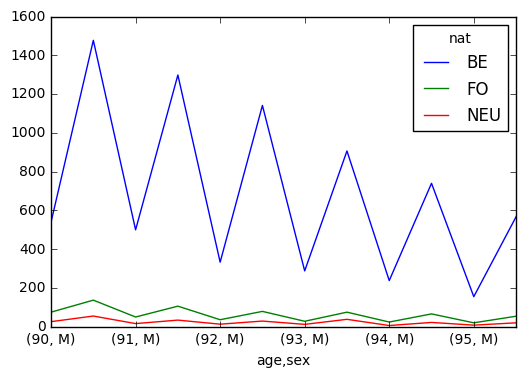

In [152]:
pop.plot()

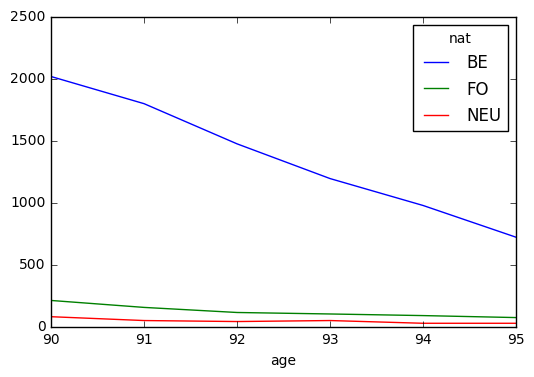

In [153]:
# plot total of both sex
pop.sum(x.sex).plot()

## Interesting methods

In [154]:
# starting array
pop = la.read_csv('pop.csv')[2016, 'BruCap', 100:105]
pop

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
102 |       M |  8 |  0
102 |       F | 26 |  1
103 |       M |  2 |  1
103 |       F | 17 |  2
104 |       M |  2 |  1
104 |       F | 14 |  0
105 |       M |  0 |  0
105 |       F |  2 |  2

### with total

Add totals to one axis

In [155]:
pop.with_total(x.sex, label='B')

age | sex\nat | BE | FO
100 |       M | 12 |  0
100 |       F | 60 |  3
100 |       B | 72 |  3
101 |       M | 12 |  2
101 |       F | 66 |  5
101 |       B | 78 |  7
102 |       M |  8 |  0
102 |       F | 26 |  1
102 |       B | 34 |  1
103 |       M |  2 |  1
103 |       F | 17 |  2
103 |       B | 19 |  3
104 |       M |  2 |  1
104 |       F | 14 |  0
104 |       B | 16 |  1
105 |       M |  0 |  0
105 |       F |  2 |  2
105 |       B |  2 |  2

Add totals to all axes at once

In [156]:
# by default label is 'total'
pop.with_total()

  age | sex\nat |  BE | FO | total
  100 |       M |  12 |  0 |    12
  100 |       F |  60 |  3 |    63
  100 |   total |  72 |  3 |    75
  101 |       M |  12 |  2 |    14
  101 |       F |  66 |  5 |    71
  101 |   total |  78 |  7 |    85
  102 |       M |   8 |  0 |     8
  102 |       F |  26 |  1 |    27
  102 |   total |  34 |  1 |    35
  103 |       M |   2 |  1 |     3
  103 |       F |  17 |  2 |    19
  103 |   total |  19 |  3 |    22
  104 |       M |   2 |  1 |     3
  104 |       F |  14 |  0 |    14
  104 |   total |  16 |  1 |    17
  105 |       M |   0 |  0 |     0
  105 |       F |   2 |  2 |     4
  105 |   total |   2 |  2 |     4
total |       M |  36 |  4 |    40
total |       F | 185 | 13 |   198
total |   total | 221 | 17 |   238

### where

where can be used to apply some compution depending on a condition

In [157]:
# where(condition, value if true, value if false)
la.where(pop < 10, 0, -pop)

age | sex\nat |  BE | FO
100 |       M | -12 |  0
100 |       F | -60 |  0
101 |       M | -12 |  0
101 |       F | -66 |  0
102 |       M |   0 |  0
102 |       F | -26 |  0
103 |       M |   0 |  0
103 |       F | -17 |  0
104 |       M |   0 |  0
104 |       F | -14 |  0
105 |       M |   0 |  0
105 |       F |   0 |  0

### clip

Set all data between a certain range

In [158]:
# clip(min, max)
# values below 10 are set to 10 and values above 50 are set to 50
pop.clip(10, 50)

age | sex\nat | BE | FO
100 |       M | 12 | 10
100 |       F | 50 | 10
101 |       M | 12 | 10
101 |       F | 50 | 10
102 |       M | 10 | 10
102 |       F | 26 | 10
103 |       M | 10 | 10
103 |       F | 17 | 10
104 |       M | 10 | 10
104 |       F | 14 | 10
105 |       M | 10 | 10
105 |       F | 10 | 10

### divnot0

Replace division by 0 to 0

In [159]:
pop['BE'] / pop['FO']

age\sex |   M |    F
    100 | inf | 20.0
    101 | 6.0 | 13.2
    102 | inf | 26.0
    103 | 2.0 |  8.5
    104 | 2.0 |  inf
    105 | nan |  1.0

In [160]:
# divnot0 replaces results of division by 0 by 0. 
# Using it should be done with care though
# because it can hide a real error in your data.
pop['BE'].divnot0(pop['FO'])

age\sex |   M |    F
    100 | 0.0 | 20.0
    101 | 6.0 | 13.2
    102 | 0.0 | 26.0
    103 | 2.0 |  8.5
    104 | 2.0 |  0.0
    105 | 0.0 |  1.0

### diff

*diff* calculates the n-th order discrete difference along given axis. 
The first order difference is given by out[n+1] = in[n + 1] - in[n] along the given axis. 

In [161]:
pop = la.read_csv('pop.csv')[2005:2015, 'BruCap', 50]
pop

time | sex\nat |   BE |   FO
2005 |       M | 4289 | 1591
2005 |       F | 4661 | 1584
2006 |       M | 4335 | 1761
2006 |       F | 4781 | 1580
2007 |       M | 4291 | 1806
2007 |       F | 4719 | 1650
2008 |       M | 4349 | 1773
2008 |       F | 4731 | 1680
2009 |       M | 4429 | 2003
2009 |       F | 4824 | 1722
2010 |       M | 4582 | 2085
2010 |       F | 4869 | 1928
2011 |       M | 4677 | 2294
2011 |       F | 5015 | 2104
2012 |       M | 4463 | 2450
2012 |       F | 4722 | 2186
2013 |       M | 4610 | 2604
2013 |       F | 4711 | 2254
2014 |       M | 4725 | 2709
2014 |       F | 4788 | 2349
2015 |       M | 4841 | 2891
2015 |       F | 4813 | 2498

In [162]:
# calculates 'pop[year+1] - pop[year]'
pop.diff(x.time)

time | sex\nat |   BE |  FO
2006 |       M |   46 | 170
2006 |       F |  120 |  -4
2007 |       M |  -44 |  45
2007 |       F |  -62 |  70
2008 |       M |   58 | -33
2008 |       F |   12 |  30
2009 |       M |   80 | 230
2009 |       F |   93 |  42
2010 |       M |  153 |  82
2010 |       F |   45 | 206
2011 |       M |   95 | 209
2011 |       F |  146 | 176
2012 |       M | -214 | 156
2012 |       F | -293 |  82
2013 |       M |  147 | 154
2013 |       F |  -11 |  68
2014 |       M |  115 | 105
2014 |       F |   77 |  95
2015 |       M |  116 | 182
2015 |       F |   25 | 149

In [163]:
# calculates 'pop[year+2] - pop[year]'
pop.diff(x.time, d=2)

time | sex\nat |   BE |  FO
2007 |       M |    2 | 215
2007 |       F |   58 |  66
2008 |       M |   14 |  12
2008 |       F |  -50 | 100
2009 |       M |  138 | 197
2009 |       F |  105 |  72
2010 |       M |  233 | 312
2010 |       F |  138 | 248
2011 |       M |  248 | 291
2011 |       F |  191 | 382
2012 |       M | -119 | 365
2012 |       F | -147 | 258
2013 |       M |  -67 | 310
2013 |       F | -304 | 150
2014 |       M |  262 | 259
2014 |       F |   66 | 163
2015 |       M |  231 | 287
2015 |       F |  102 | 244

### ratio

In [164]:
pop.ratio(x.nat)

# which is equivalent to
pop / pop.sum(x.nat)

time | sex\nat |                 BE |                  FO
2005 |       M |  0.729421768707483 |   0.270578231292517
2005 |       F | 0.7463570856685349 |  0.2536429143314652
2006 |       M | 0.7111220472440944 |  0.2888779527559055
2006 |       F | 0.7516113818581984 |  0.2483886181418016
2007 |       M |  0.703788748564868 | 0.29621125143513205
2007 |       F | 0.7409326424870466 | 0.25906735751295334
2008 |       M | 0.7103887618425351 | 0.28961123815746487
2008 |       F | 0.7379503977538605 | 0.26204960224613943
2009 |       M | 0.6885883084577115 | 0.31141169154228854
2009 |       F | 0.7369385884509624 | 0.26306141154903756
2010 |       M | 0.6872656367181641 |  0.3127343632818359
2010 |       F | 0.7163454465205238 |  0.2836545534794762
2011 |       M | 0.6709223927700474 | 0.32907760722995266
2011 |       F | 0.7044528725944655 | 0.29554712740553446
2012 |       M | 0.6455952553160712 | 0.35440474468392885
2012 |       F | 0.6835552982049797 | 0.31644470179502027
2013 |       M

### percents

In [165]:
# or, if you want the previous ratios in percents
pop.percent(x.nat)

time | sex\nat |                 BE |                 FO
2005 |       M |   72.9421768707483 |   27.0578231292517
2005 |       F |  74.63570856685348 | 25.364291433146516
2006 |       M |  71.11220472440945 | 28.887795275590552
2006 |       F |  75.16113818581984 |  24.83886181418016
2007 |       M |   70.3788748564868 | 29.621125143513204
2007 |       F |  74.09326424870466 | 25.906735751295336
2008 |       M |  71.03887618425351 |  28.96112381574649
2008 |       F |  73.79503977538606 | 26.204960224613945
2009 |       M |  68.85883084577114 | 31.141169154228855
2009 |       F |  73.69385884509624 |  26.30614115490376
2010 |       M |  68.72656367181641 | 31.273436328183593
2010 |       F |  71.63454465205237 | 28.365455347947623
2011 |       M |  67.09223927700474 |  32.90776072299526
2011 |       F |  70.44528725944654 | 29.554712740553448
2012 |       M |  64.55952553160712 | 35.440474468392885
2012 |       F |  68.35552982049798 | 31.644470179502026
2013 |       M |  63.9035209315

### growth_rate

using the same principle than diff...

In [166]:
pop.growth_rate(x.time)

time | sex\nat |                    BE |                     FO
2006 |       M |  0.010725110748426206 |    0.10685103708359522
2006 |       F |  0.025745548165629694 | -0.0025252525252525255
2007 |       M | -0.010149942329873126 |    0.02555366269165247
2007 |       F | -0.012967998326709893 |    0.04430379746835443
2008 |       M |  0.013516662782568165 |  -0.018272425249169437
2008 |       F | 0.0025429116338207248 |    0.01818181818181818
2009 |       M |   0.01839503334099793 |    0.12972363226170333
2009 |       F |  0.019657577679137603 |                  0.025
2010 |       M |   0.03454504402799729 |   0.040938592111832255
2010 |       F |  0.009328358208955223 |    0.11962833914053426
2011 |       M |   0.02073330423395897 |    0.10023980815347722
2011 |       F |  0.029985623331279524 |     0.0912863070539419
2012 |       M |  -0.04575582638443447 |    0.06800348735832606
2012 |       F |   -0.0584247258225324 |    0.03897338403041825
2013 |       M |   0.03293748599596684 |

### shift

The *shift* method drops first label of an axis and shifts all subsequent labels

In [167]:
pop.shift(x.time)

time | sex\nat |   BE |   FO
2006 |       M | 4289 | 1591
2006 |       F | 4661 | 1584
2007 |       M | 4335 | 1761
2007 |       F | 4781 | 1580
2008 |       M | 4291 | 1806
2008 |       F | 4719 | 1650
2009 |       M | 4349 | 1773
2009 |       F | 4731 | 1680
2010 |       M | 4429 | 2003
2010 |       F | 4824 | 1722
2011 |       M | 4582 | 2085
2011 |       F | 4869 | 1928
2012 |       M | 4677 | 2294
2012 |       F | 5015 | 2104
2013 |       M | 4463 | 2450
2013 |       F | 4722 | 2186
2014 |       M | 4610 | 2604
2014 |       F | 4711 | 2254
2015 |       M | 4725 | 2709
2015 |       F | 4788 | 2349

In [168]:
# when shift is applied on an (increasing) time axis, it effectively brings "past" data into the future
pop.shift(x.time).drop_labels(x.time) == pop[2005:2014].drop_labels(x.time)

time* | sex\nat |   BE |   FO
    0 |       M | True | True
    0 |       F | True | True
    1 |       M | True | True
    1 |       F | True | True
    2 |       M | True | True
    2 |       F | True | True
    3 |       M | True | True
    3 |       F | True | True
    4 |       M | True | True
    4 |       F | True | True
    5 |       M | True | True
    5 |       F | True | True
    6 |       M | True | True
    6 |       F | True | True
    7 |       M | True | True
    7 |       F | True | True
    8 |       M | True | True
    8 |       F | True | True
    9 |       M | True | True
    9 |       F | True | True

In [169]:
# this is mostly useful when you want to do operations between the past and now
# as an example, here is an alternative implementation of the .diff method seen above:
pop.i[1:] - pop.shift(x.time)

time | sex\nat |   BE |  FO
2006 |       M |   46 | 170
2006 |       F |  120 |  -4
2007 |       M |  -44 |  45
2007 |       F |  -62 |  70
2008 |       M |   58 | -33
2008 |       F |   12 |  30
2009 |       M |   80 | 230
2009 |       F |   93 |  42
2010 |       M |  153 |  82
2010 |       F |   45 | 206
2011 |       M |   95 | 209
2011 |       F |  146 | 176
2012 |       M | -214 | 156
2012 |       F | -293 |  82
2013 |       M |  147 | 154
2013 |       F |  -11 |  68
2014 |       M |  115 | 105
2014 |       F |   77 |  95
2015 |       M |  116 | 182
2015 |       F |   25 | 149

### Misc other interesting functions

There are a lot more functions available: 
- round, floor, ceil, trunc, 
- exp, log, log10, 
- sqrt, absolute, nan_to_num, isnan, isinf, inverse,
- sin, cos, tan, arcsin, arccos, arctan
- ...
- and many many more...

## Sessions (Experimental)

You can group several arrays in a *Session*

In [170]:
# load several arrays
household = la.read_csv('hh.csv')
pop = la.read_csv('pop.csv')
mortality = la.read_csv('qx.csv')

# create and populate a 'session'
s1 = la.Session()
s1.household = household
s1.pop = pop
s1.mortality = mortality

s1

Session(household, pop, mortality)

The advantage of sessions is that you can manipulate all of the arrays in them in one shot

In [171]:
# this saves all the arrays in a single excel file (each array on a different sheet)
s1.dump('test.xlsx')

In [172]:
# this saves all the arrays in a single HDF5 file (which is a very fast format)
s1.dump('test.h5')

In [173]:
# this creates a session out of all arrays in the .h5 file
s2 = la.Session('test.h5')
s2

Session(household, mortality, pop)

In [174]:
# the excel version does not work currently (axes are not detected properly)
with ExCtx():
    s3 = la.Session('test.xlsx')

<class 'ValueError'> total size of new array must be unchanged


You can compare two sessions

In [175]:
s1 == s2

name | household |  pop | mortality
     |      True | True |      True

In [176]:
# let us introduce a difference (a variant, or a mistake perhaps)
s2.pop['F', 2010:] = 0

In [177]:
s1 == s2

name | household |   pop | mortality
     |      True | False |      True

In [178]:
s1_diff = s1[s1 != s2]
s1_diff

Session(pop)

In [179]:
s2_diff = s2[s1 != s2]
s2_diff

Session(pop)

This a bit experimental but can be usefull nonetheless (Open a graphical interface)

In [180]:
la.compare(s1_diff.pop, s2_diff.pop)